# **Metric: Number of Traffic Signs 🚸**
### By Michelle Hong


We analysized the number of traffic signs in each neighborhood in order to determine which neighborhood enforces more caution for drivers.

*The more amount of traffic signs, the more safe the neighborhood would be for children to be out in*

## Importing Pandas, Matplotlin, and Geopandas & the Data

Found the neighborhood identifier called 'neighborhood'

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [9]:
# importing the data:
trafficSigns = pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")
trafficSigns.head()

id mutcd_code address_number          street        city  \
0  1673225887       R1-1            900  California Ave  Pittsburgh   
1   668379452       R1-1            107     Glenbury St  Pittsburgh   
2   174468442       R1-1           5325      Forbes Ave  Pittsburgh   
3  1517107112       R1-1           1437   N St Clair St  Pittsburgh   
4  1374142598         WF            228     Isabella St  Pittsburgh   

  mounting_fixture date_installed         description          neighborhood  \
0        Wood Pole            NaN                Stop  California-Kirkbride   
1          Channel            NaN                Stop             Overbrook   
2        Wood Pole            NaN                Stop   Squirrel Hill North   
3          Channel            NaN                Stop         Highland Park   
4       Metal Pole     1995-02-14  Wayfinding Signage           North Shore   

   council_district  ward         tract  public_works_division  pli_division  \
0               6.0  25.0  4.200325e+10                    1.0          25.0   
1               4.0  32.0  4.200332e+10                    5.0          32.0   
2               8.0  14.0  4.200314e+10                    3.0          14.0   
3               7.0  11.0  4.200311e+10                    2.0          11.0   
4               1.0  22.0  4.200356e+10                    6.0          22.0   

   police_zone fire_zone   latitude  longitude  
0          1.0       1-9  40.459325 -80.019057  
1          3.0      4-25  40.386955 -80.002161  
2          4.0       2-8  40.439828 -79.934814  
3          5.0       3-9  40.478685 -79.919270  
4          1.0      1-20  40.448482 -80.000671

In [13]:
print(len(trafficSigns['neighborhood'].unique()))
trafficSigns['neighborhood'].unique()

92


array(['California-Kirkbride', 'Overbrook', 'Squirrel Hill North',
       'Highland Park', 'North Shore', 'East Allegheny',
       'Central Northside', 'Bluff', 'Point Breeze', 'Central Oakland',
       'North Oakland', 'South Oakland', 'Shadyside', 'West Oakland',
       'Central Business District', 'Terrace Village', 'Mount Washington',
       'Upper Hill', 'Polish Hill', 'Middle Hill', 'East Hills',
       'Squirrel Hill South', 'East Liberty', 'Brighton Heights',
       'Knoxville', 'Lincoln-Lemington-Belmar', 'Homewood South',
       'Greenfield', 'Bloomfield', 'Homewood North', 'Carrick',
       'Strip District', 'Regent Square', 'Crawford-Roberts',
       'South Side Slopes', 'South Side Flats', nan, 'Allegheny Center',
       'Lower Lawrenceville', 'Beechview', 'Spring Hill-City View',
       'Marshall-Shadeland', 'Elliott', 'West End', 'Allegheny West',
       'Lincoln Place', 'Chateau', 'Swisshelm Park', 'Brookline',
       'Westwood', 'Perry North', 'Point Breeze North', 'La

## Creating a New Dataset

Using panda's "group-by" function we were able to make a new dataset that matched each neighborhood to the total times a mounting fixture showed up.
Then we sorted the dataset by the values to find the neighborhood with the highest number of traffic sign occurances and the lowest amount of traffic sign occurances

In [14]:
signsPerNeighborhood = trafficSigns.groupby('neighborhood')['mounting_fixture'].count()
signsPerNeighborhood.sort_values(ascending = False)

neighborhood
South Side Flats             3672
Bloomfield                   3627
Central Business District    3491
Shadyside                    3370
Squirrel Hill South          3281
                             ... 
Ridgemont                      62
Chartiers City                 44
Glen Hazel                     38
Arlington Heights              21
Mount Oliver Borough           17
Name: mounting_fixture, Length: 91, dtype: int64

## Using Geopandas
We then loaded the neighborhoods map object and merged our data from the map and our dataset to make a map that puts together the number of mounting fixtures with the neighborhood

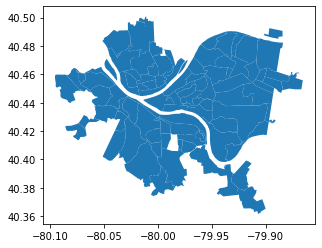

In [40]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [41]:
mapMF = neighborhoods.merge(signsPerNeighborhood, how='left', left_on='hood', right_on='neighborhood')
mapMF [['hood', 'mounting_fixture','geometry']].head()

hood  mounting_fixture  \
0   Central Oakland              1327   
1     North Oakland              1743   
2      West Oakland               486   
3  Crawford-Roberts               784   
4    Strip District              1366   

                                            geometry  
0  POLYGON ((-79.95304 40.44203, -79.95302 40.442...  
1  POLYGON ((-79.95455 40.45882, -79.95427 40.458...  
2  POLYGON ((-79.96230 40.44294, -79.96220 40.442...  
3  POLYGON ((-79.98275 40.44641, -79.98273 40.446...  
4  POLYGON ((-79.97494 40.45629, -79.97484 40.456...

## Making the Map

To make the map, we used the mapping feature on geopandas to make a choropleth map that made the areas with more mounting fixtures darker 

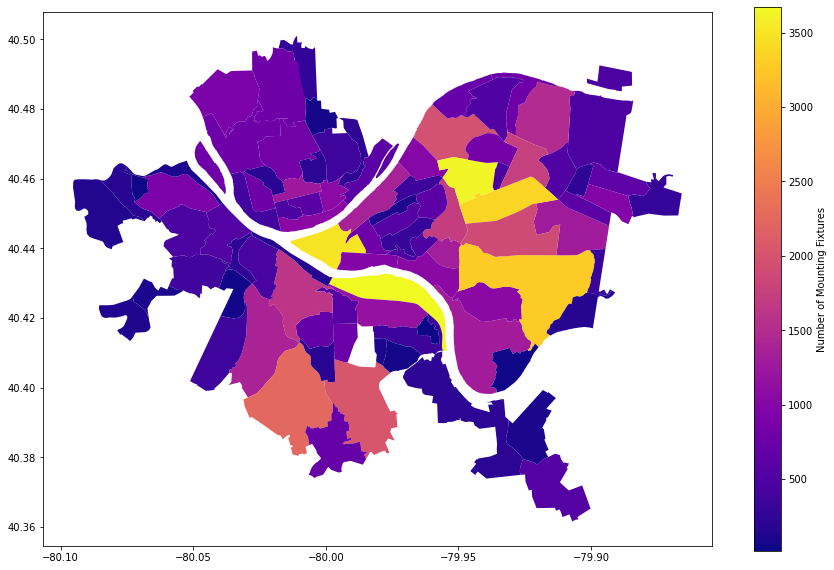

In [64]:
mapMF.plot(column='mounting_fixture', 
           cmap='plasma', 
           legend=True, 
            legend_kwds={'label': "Number of Mounting Fixtures"},
          figsize=(15, 10)) 

## Conclusion

Based on the visualized data, the most likely neighborhood where drivers would be most cautious in would be Southside Flats and Bloomfield. However, because there is data in every single neighborhood on mounting fixtures, it is hard to determine where children will be at risk from reckless drivers. But, based on the map we can assume that neighborhoods such as Chartiers City, Esplen, and Glen Hazel would make children the most at risk on the streets.